**Goal:** represent the tracks downloaded from [Wikiloc](http://wikiloc.com/) or transformed into .gpx format from Garmin .fit files, using for example the [gpsbabel](http://www.gpsbabel.org/) tool.

In [1]:
import os
import glob
import logging
import shutil
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from GPX_functions import * 
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# User inputs

Define the directory where the files are stored and where the html will be written.

In [22]:
region = 'GranCanaria'
gpxdir = '/home/ctroupin/DataOceano/GPX/' + region
gpxbasename = '*.gpx'
gpxfilelist = sorted(glob.glob(os.path.join(gpxdir, gpxbasename)))
figdir = '/home/ctroupin/' 
figname = 'GCtrack'

Initialise the map

In [19]:
coordinates = (-15.9, -15.3, 27.7, 28.2)
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='f')

Loop on the files

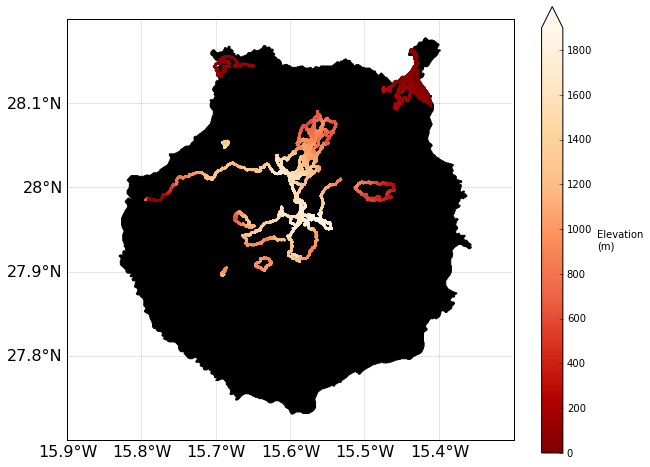

In [23]:
cmap = plt.cm.OrRd_r
coordsall = []
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax
for gpxfiles in gpxfilelist[:-1]:

    #print gpxfiles
    lon, lat, elevation = read_gpx_lonlat(gpxfiles)
    llon, llat = m(lon, lat)
    if elevation:
        plt.scatter(llon, llat, s=5, c=elevation, edgecolor='None', 
                    cmap=cmap, vmin=0., vmax=1900., zorder=3)
    else: 
        plt.plot(llon, llat, 'w', linewidth=0.5, zorder=3)

cbar = plt.colorbar(extend='max', shrink=.8)
cbar.set_label('Elevation\n(m)', rotation=0, ha='left')
m.drawcoastlines()
m.fillcontinents(color='black', zorder=2)

m.drawparallels(np.arange(coordinates[2], coordinates[3], .1), linewidth=0.2,
                labels=[1, 0, 0, 0], fontname='Times New Roman', fontsize=16, zorder=1)
m.drawmeridians(np.arange(coordinates[0], coordinates[1], .1), linewidth=0.2,
                labels=[0, 0, 0, 1], fontname='Times New Roman', fontsize=16, zorder=1)


#plt.show()    
coords2plot = [item for coords in coordsall for item in coords] 
plt.savefig(os.path.join(figdir, figname))